<a href="https://colab.research.google.com/github/Afix0/BP/blob/main/Subgroups_test004_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install subgroups


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.0/255.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 13.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import kagglehub
import os

path = kagglehub.dataset_download("rhuebner/human-resources-data-set")

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

hr_data = pd.read_csv(csv_file_path)
hr_data.head()
# informace k datasetu: https://rpubs.com/rhuebner/hrd_cb_v14

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
hr_data_trans = hr_data.drop(columns=['EmpID', 'ManagerID', 'PositionID', 'MaritalStatusID', 'Zip', 'DeptID', 'MarriedID', 'GenderID', 'EmpStatusID', 'DOB', 'LastPerformanceReview_Date', 'Termd', 'TermReason', 'DateofHire', 'DateofTermination', 'SpecialProjectsCount', 'DaysLateLast30', 'FromDiversityJobFairID', 'HispanicLatino', 'PerfScoreID'])

hr_data_trans.head()

hr_data_trans.head()
# hr_data_trans.info()
# hr_data_trans.boxplot(column='Salary', figsize=(8, 6))


,Employee_Name,Salary,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences
0,"Adinolfi, Wilson K",62506,Production Technician I,MA,M,Single,US Citizen,White,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,1
1,"Ait Sidi, Karthikeyan",104437,Sr. DBA,MA,M,Married,US Citizen,White,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,17
2,"Akinkuolie, Sarah",64955,Production Technician II,MA,F,Married,US Citizen,White,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,3
3,"Alagbe,Trina",64991,Production Technician I,MA,F,Married,US Citizen,White,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,15
4,"Anderson, Carol",50825,Production Technician I,MA,F,Divorced,US Citizen,White,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,2


In [ ]:
from subgroups.quality_measures import WRAcc
from subgroups.quality_measures import WRAccOptimisticEstimate1
from subgroups.algorithms import BSD
from subgroups.algorithms import VLSD
from subgroups.algorithms import SDMapStar
from subgroups.algorithms import SDMap
from subgroups.algorithms import DSLM
from subgroups.algorithms import GMSL
from subgroups.utils.file_format_transformations import to_input_format_for_subgroup_list_algorithms

dataset = hr_data_trans.astype(str)
target = ('PerformanceScore', 'Exceeds')


#dokumentace: https://www.um.es/subgroups/project_files/subgroups.algorithms.subgroup_sets.html#module-subgroups.algorithms.subgroup_sets.sdmapstar
methods = {
    # 'sdmap': SDMap(quality_measure = WRAcc(), minimum_quality_measure_value = 0.025, minimum_n = 3, write_results_in_file = True, file_path = "./sdmap_results.txt"),
    'sdmapstar': SDMapStar(WRAcc(), WRAccOptimisticEstimate1(), 0.025, num_subgroups=3, minimum_n = 3, write_results_in_file=True, file_path="./sdmapstar_results.txt"),
    # 'vlsd': VLSD(quality_measure = WRAcc(), q_minimum_threshold  = 0.03, optimistic_estimate = WRAccOptimisticEstimate1(), oe_minimum_threshold = -1, sort_criterion_in_s1 = VLSD.SORT_CRITERION_NO_ORDER, sort_criterion_in_other_sizes = VLSD.SORT_CRITERION_NO_ORDER, vertical_lists_implementation = VLSD.VERTICAL_LISTS_WITH_BITSETS, write_results_in_file = True, file_path = "./vlsd_result.txt"),
    # 'bsd': BSD(min_support=0, quality_measure=WRAcc(), optimistic_estimate = WRAccOptimisticEstimate1(), num_subgroups=60, max_depth=100)
}


for method_name, method_instance in methods.items():
  method_instance.fit(dataset, target)


**WRAcc (Weighted Relative Accuracy)**

**Formula:**

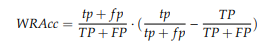



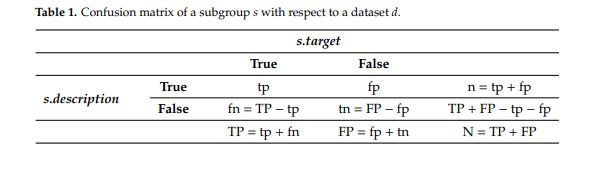

(from VLSD paper)

**Subgroups found by each method:**

In [50]:
for method_name, method_instance in methods.items():
  print(f"Subgroups selected by {method_name}: {method_instance.selected_subgroups}")
  with open(f"./{method_name}_results.txt", "r") as file:
      for line in file:
          print(line.strip())


Subgroups selected by sdmap: 0
Subgroups selected by sdmapstar: 22
Description: [CitizenDesc = 'US Citizen', EmpSatisfaction = '5'], Target: PerformanceScore = 'Exceeds' ; Quality Measure WRAcc = 0.03445994148116748 ; tp = 15 ; fp = 21 ; TP = 37 ; FP = 274
Description: [EmpSatisfaction = '5', State = 'MA'], Target: PerformanceScore = 'Exceeds' ; Quality Measure WRAcc = 0.03239213821197052 ; tp = 14 ; fp = 19 ; TP = 37 ; FP = 274
Description: [CitizenDesc = 'US Citizen', EmpSatisfaction = '5', State = 'MA'], Target: PerformanceScore = 'Exceeds' ; Quality Measure WRAcc = 0.03239213821197052 ; tp = 14 ; fp = 19 ; TP = 37 ; FP = 274
Description: [EmpSatisfaction = '5', EmploymentStatus = 'Active'], Target: PerformanceScore = 'Exceeds' ; Quality Measure WRAcc = 0.025041097589975293 ; tp = 11 ; fp = 16 ; TP = 37 ; FP = 274
Description: [CitizenDesc = 'US Citizen', EmpSatisfaction = '5', EmploymentStatus = 'Active'], Target: PerformanceScore = 'Exceeds' ; Quality Measure WRAcc = 0.02504109758

**Subgroup discovery (SD)**

from VLSD paper:

>Moreover, the populations covered
by different subgroups **may overlap**

> One disadvantage of the SD technique is the huge number of subgroups that could be
generated (i.e., pattern explosion), and it is especially relevant when using input datasets
with too many attributes. For this reason, the utilization of an optimistic estimate provides
a solution of this problem when the quality measure threshold established allows not to
explore a large part of the search space.


> It is sometimes possible that two subgroups generated by a specific SD algorithm are
redundant, because they represent and explain the same portion of data from a specific
dataset.





**VLSD (Vertical List Subgroup Discovery)**

paper: https://www.mdpi.com/1999-4893/16/6/274

> Differences between this technique and others, such as clustering, pattern mining, or classification.
Clustering and pattern mining algorithms are unsupervised and do not use an output attribute or class, while SD algorithms are supervised and generate relations (called subgroups) with respect to a **target attribute.**




*// na konci clanku je benchmark VLSD vs SD-Map vs BSD vs CBSD vs CPBSD strana 16-17*


**SD-Map**

paper: https://link.springer.com/chapter/10.1007/11871637_6


>  an exhaustive search method, uses frequent pattern trees (FP-Tree)



**SD-Map***

paper: https://link.springer.com/chapter/10.1007/978-3-642-04125-9_7
//od 49 strany




>SD-Map* algorithm as a novel adaptation of the efficient SD-Map algorithm.
Efficiently adapt exhaustive subgroup discovery for continuous target concepts.
Basic principle of optimistic estimates is to safely prune parts of the search space...



**Q-finder**

paper: https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2020.559927/full



>  It combines an
exhaustive search with a cascade of filters based on metrics assessing key credibility criteria,
including relative risk reduction assessment, adjustment on confounding factors, individual
feature’s contribution to the subgroup’s effect, interaction tests for assessing betweensubgroup treatment effect interactions and tests adjustment (multiple testing).



**BSD, Closed BSD and Closed on the positives BSD**

paper: https://cdn.aaai.org/ocs/1262/1262-7800-1-PB.pdf


> BSD is a subgroup discovery algorithm that introduces the concept of dominance relation between subgroups. This algorithm also uses a list of the
 best subgroups along with an optimistic estimation to prune the search space.





**DSLM (Diverse Subgroup Lists Miner)**

paper: https://doi.org/10.1007/978-3-031-34344-5_6 //strana 45-50


> generates subgroup
lists based on the subgroup discovery paradigm and the minimum description
length principle



**GMSL (Generation of Multiple Subgroup Lists)**

paper: https://doi.org/10.1007/978-3-031-30047-9_21 //strana 262-273


>  an algorithm that takes a set of
pre-computed subgroup candidates as input and returns a collection of diverse
top-k subgroup lists

